# **Classification of direct marketing Compaign Subscriptions**

### 1. **importing data, libraries and EDA**

In [115]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as  sns 
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore') 
from scipy.stats import  norm
from pprint import  pprint as p

#Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split

#classifiers

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import  SVC
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier

#metrics
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_curve,roc_auc_score
















# Dataset Description: Bank marketing

## **Client Information**
1. **Age**: Client's age *(Numeric)*.  
2. **Job**: Client's type of job *(Categorical)*:  
   - Options: `'admin.'`, `'blue-collar'`, `'entrepreneur'`, `'housemaid'`, `'management'`, `'retired'`, `'self-employed'`, `'services'`, `'student'`, `'technician'`, `'unemployed'`, `'unknown'`.  
3. **Marital Status**: Client's marital status *(Categorical)*:  
   - Options: `'divorced'` *(includes divorced or widowed)*, `'married'`, `'single'`, `'unknown'`.  
4. **Education**: Client's level of education *(Categorical)*:  
   - Options: `'basic.4y'`, `'basic.6y'`, `'basic.9y'`, `'high.school'`, `'illiterate'`, `'professional.course'`, `'university.degree'`, `'unknown'`.  
5. **Default**: Whether the client has credit in default *(Categorical)*:  
   - Options: `'no'`, `'yes'`, `'unknown'`.  
6. **Housing Loan**: Whether the client has a housing loan *(Categorical)*:  
   - Options: `'no'`, `'yes'`, `'unknown'`.  
7. **Personal Loan**: Whether the client has a personal loan *(Categorical)*:  
   - Options: `'no'`, `'yes'`, `'unknown'`.  

---

## **Last Campaign Contact Information**
8. **Contact**: Contact communication type *(Categorical)*:  
   - Options: `'cellular'`, `'telephone'`.  
9. **Month**: Last contact month of the year *(Categorical)*:  
   - Options: `'jan'`, `'feb'`, `'mar'`, ..., `'nov'`, `'dec'`.  
10. **Day of Week**: Last contact day of the week *(Categorical)*:  
    - Options: `'mon'`, `'tue'`, `'wed'`, `'thu'`, `'fri'`.  

---

## **Campaign Details**
11. **Campaign**: Number of contacts performed during this campaign for this client *(Numeric, includes the last contact)*.  
12. **Pdays**: Number of days since the client was last contacted in a previous campaign *(Numeric; `999` means the client was not previously contacted)*.  
13. **Previous**: Number of contacts performed before this campaign for this client *(Numeric)*.  
14. **Poutcome**: Outcome of the previous marketing campaign *(Categorical)*:  
    - Options: `'failure'`, `'nonexistent'`, `'success'`.  

---

## **Social and Economic Context Attributes**
15. **Employment Variation Rate (emp.var.rate)**: Quarterly indicator for the employment variation rate *(Numeric)*.  
16. **Consumer Price Index (cons.price.idx)**: Monthly indicator for the consumer price index *(Numeric)*.  
17. **Consumer Confidence Index (cons.conf.idx)**: Monthly indicator measuring consumer optimism or pessimism about the economy *(Numeric)*.  
18. **Euribor 3-Month Rate (euribor3m)**: Daily indicator of the 3-month Euribor (Euro Interbank Offered Rate), which reflects the interest rate at which European banks lend to one another *(Numeric)*.  
19. **Number of Employees (nr.employed)**: Quarterly indicator of the total number of employees in the economy *(Numeric)*.  

---

## **Output Variable (Target)**
20. **Subscribed Term Deposit (y)**: Whether the client subscribed to a term deposit *(Binary)*:  
    - Options: `'yes'`, `'no'`.


In [85]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

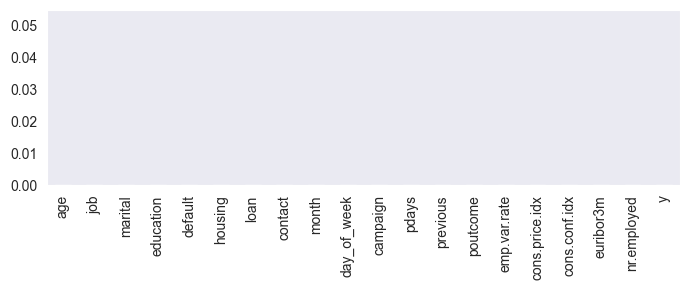

In [87]:
plt.figure(figsize=(7,3))
df.isna().sum().plot(kind='bar')
plt.ylim(0)
plt.tight_layout()

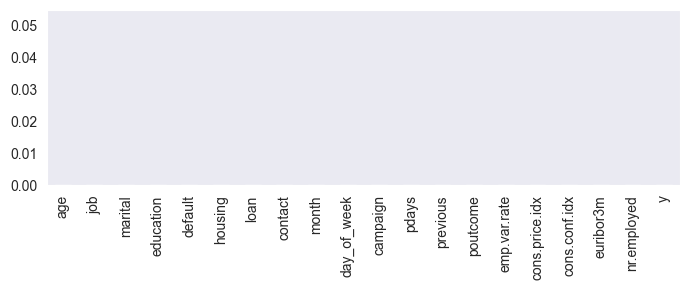

In [88]:
plt.figure(figsize=(7,3))
df.isnull().sum().plot(kind='bar')
plt.ylim(0)
plt.tight_layout()

In [89]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [90]:
[col for col in df.columns if df[col].dtype == 'object']

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

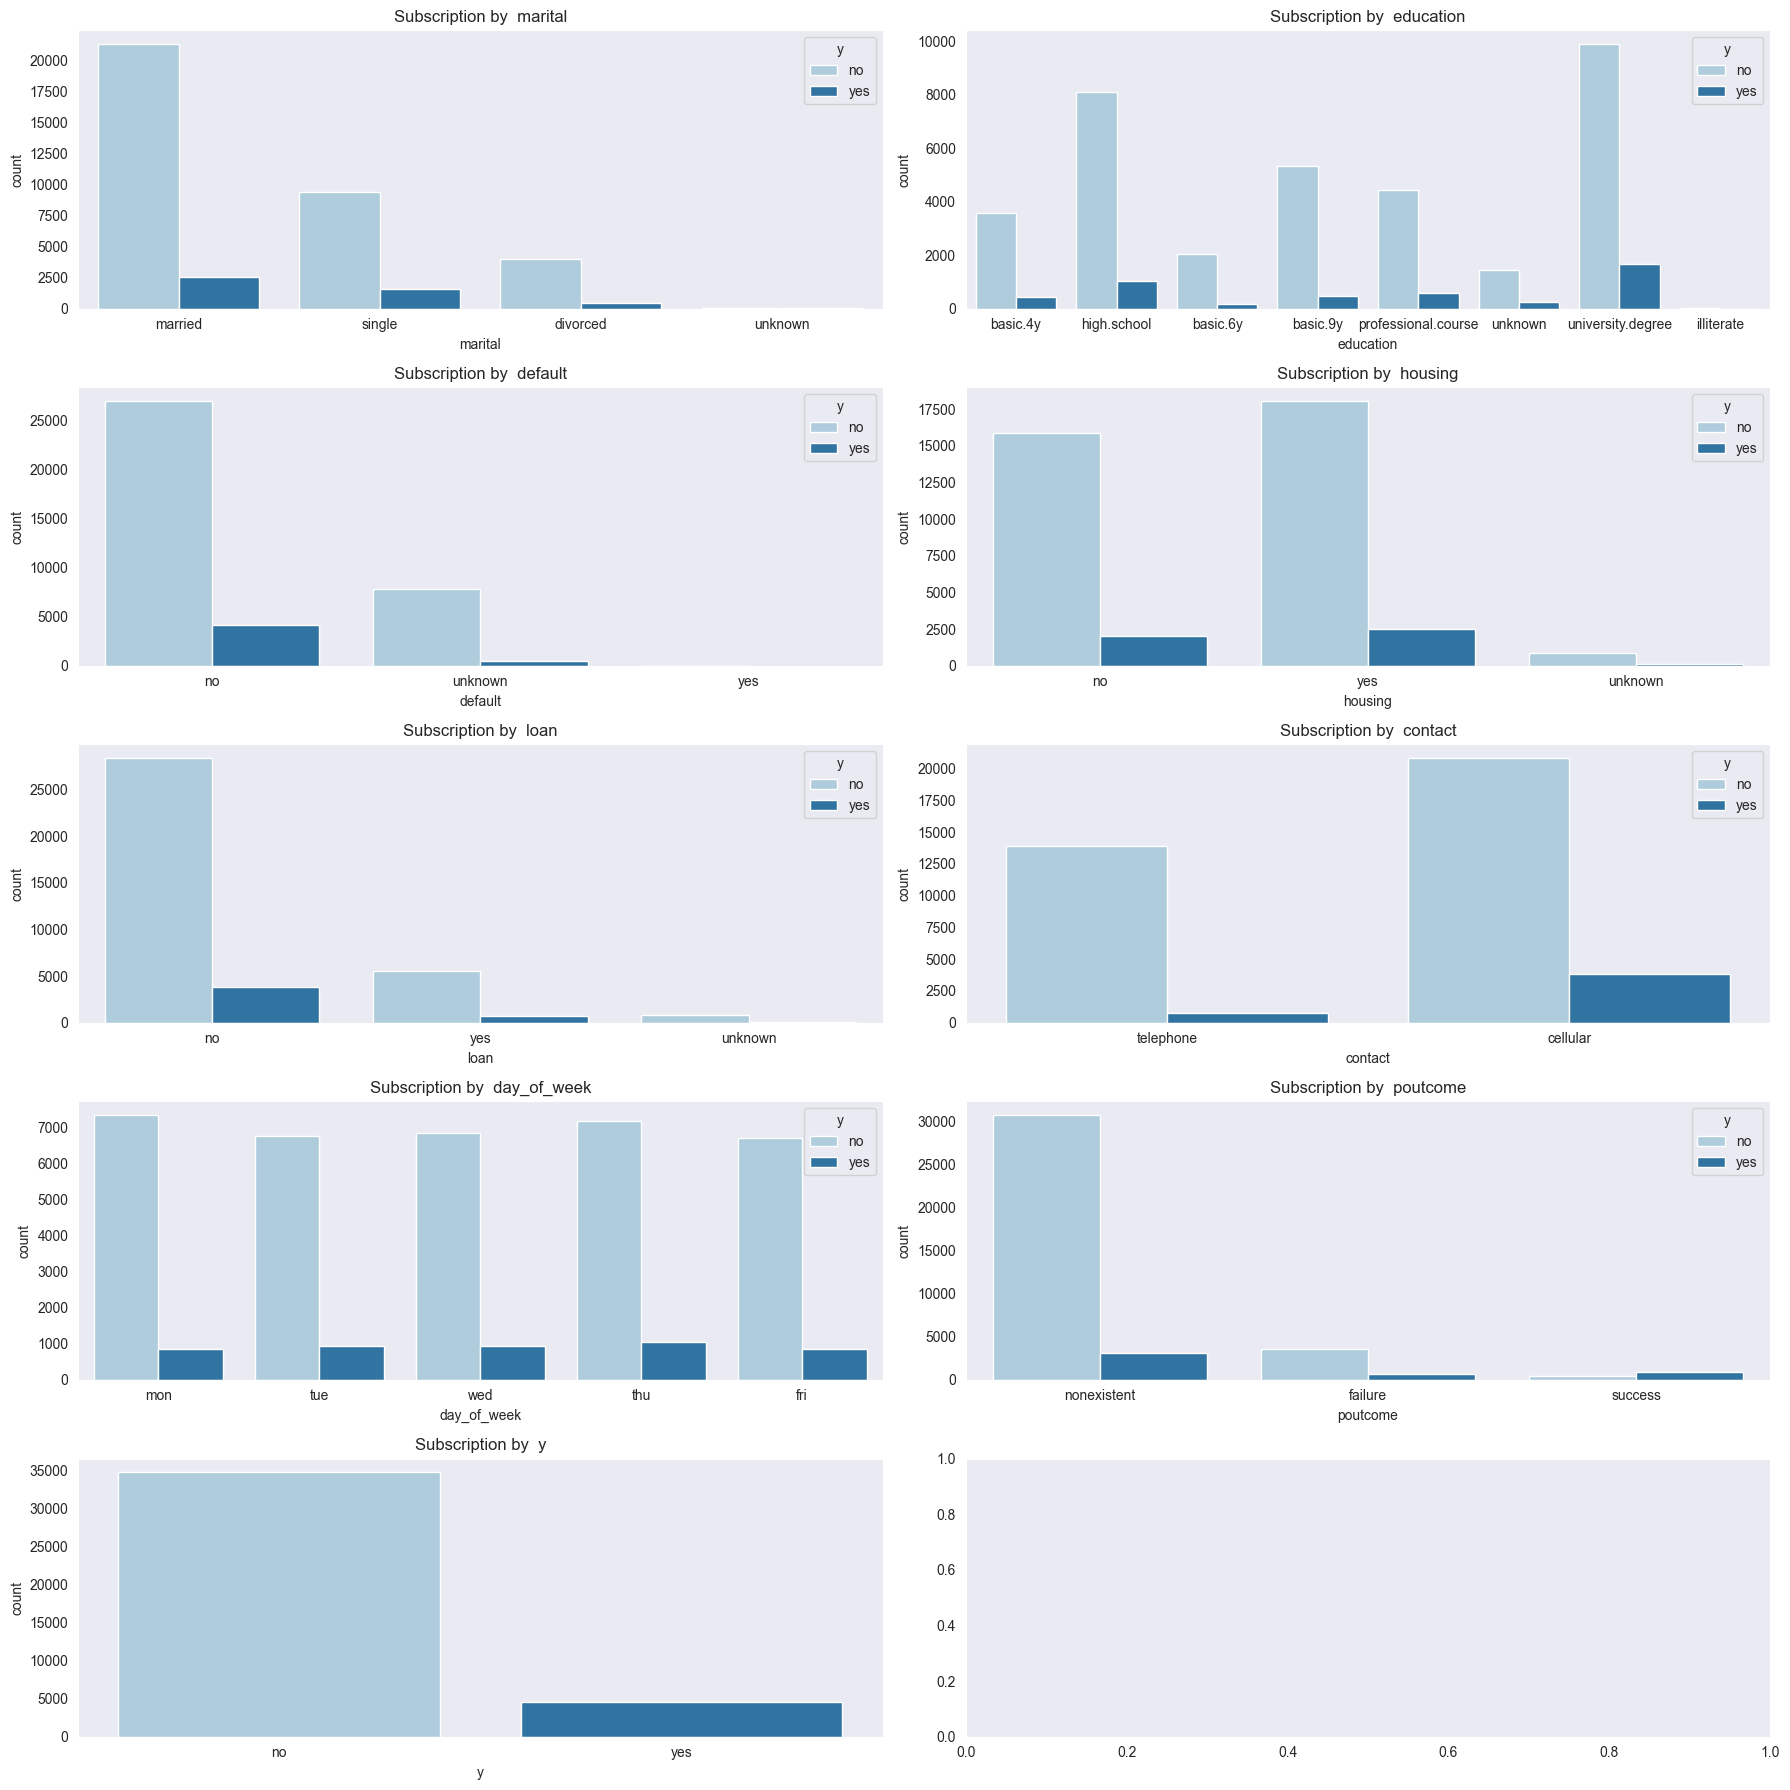

In [ ]:
sns.set_style('dark')
fig,ax = plt.subplots(5,2,figsize=(18,18))
ax = ax.flatten()
axe = 0
for col in df.columns:
    if df[col].dtype == 'object' and len(df[col].unique()) <=8:
        sns.countplot(df,x=col,hue='y',palette='Paired',ax=ax[axe])
        ax[axe].set_title(f'Subscription by  {col}')
        axe +=1
plt.tight_layout()        
       

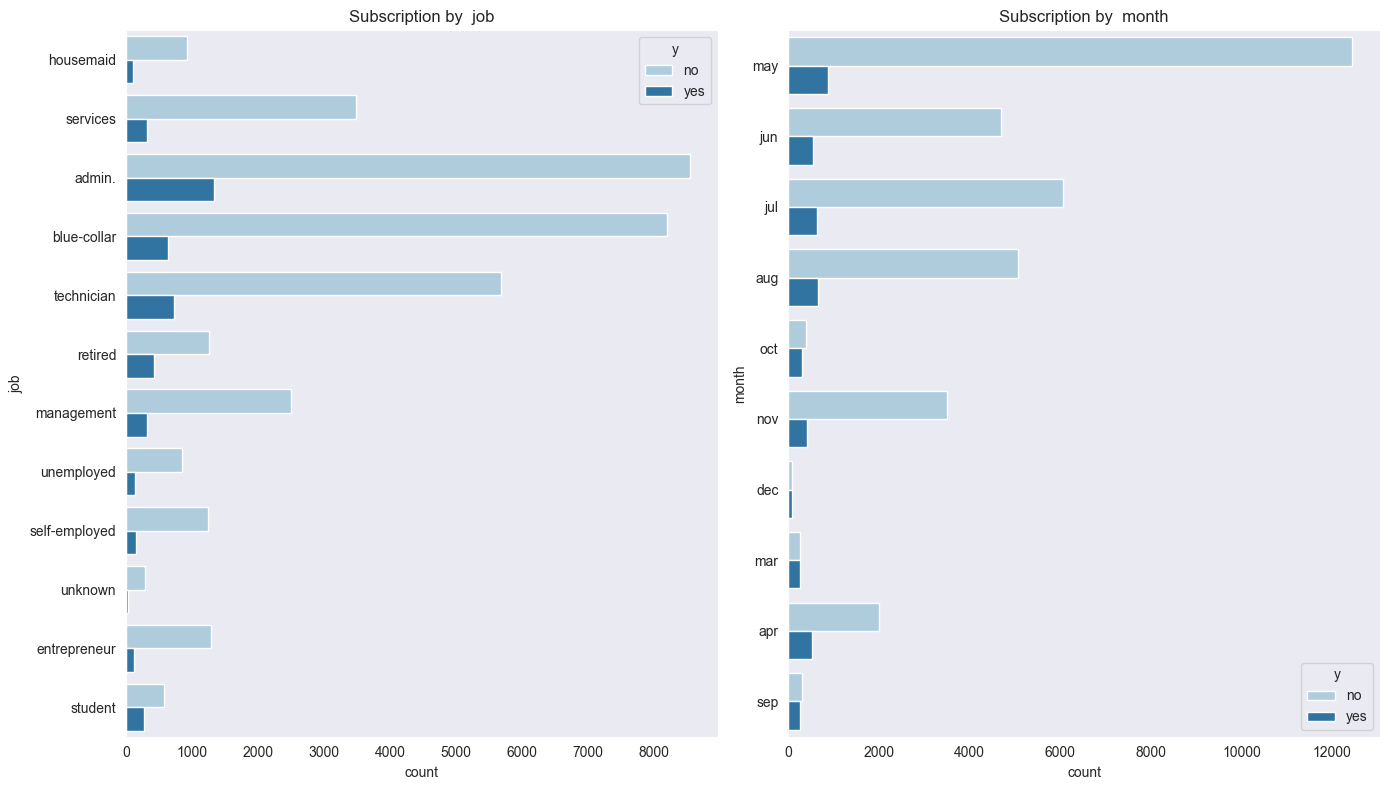

In [92]:
fig,ax = plt.subplots(1,2,figsize=(14,8))
ax = ax.flatten()
axe = 0
for col in df.columns:
    if df[col].dtype == 'object' and len(df[col].unique()) > 8  :
        sns.countplot(df,y=col,hue='y',palette='Paired',ax=ax[axe])
        ax[axe].set_title(f'Subscription by  {col}')
        axe +=1
plt.tight_layout()  

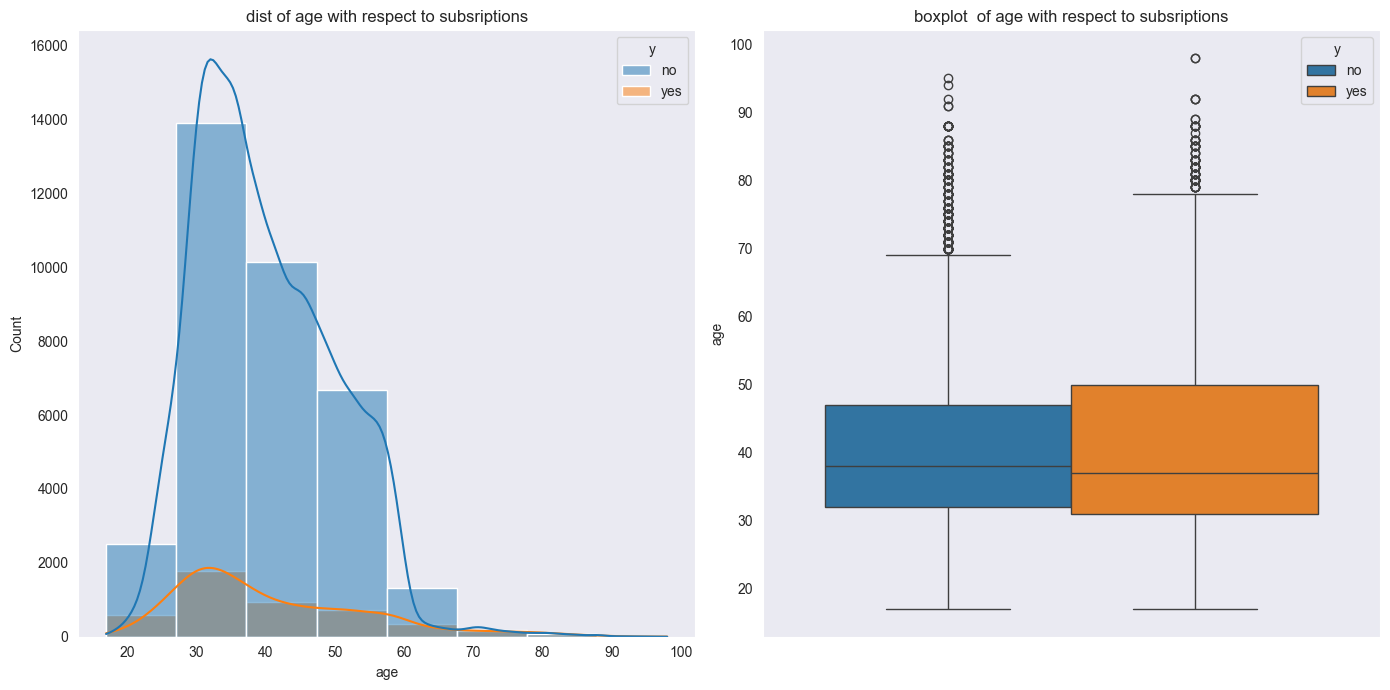

In [93]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.histplot(df,x='age',hue='y',kde=True,bins=8)
plt.title('dist of age with respect to subsriptions')
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(df,y='age',hue='y')
plt.title('boxplot  of age with respect to subsriptions')
plt.tight_layout()


In [94]:
num = [col for col in df.columns if df[col].dtype in ['float64','int']]

In [95]:
df[[col for col in df.columns if df[col].dtypes == "object"]]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


### 2. **Data processing : encoding ,standardisation, cleaning**

In [96]:
for col in df[[col for col in df.columns if df[col].dtypes == "object"]].columns :
    print('col name is :', col)
    print(df[col].unique())
    print('_'*100)

col name is : job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
____________________________________________________________________________________________________
col name is : marital
['married' 'single' 'divorced' 'unknown']
____________________________________________________________________________________________________
col name is : education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
____________________________________________________________________________________________________
col name is : default
['no' 'unknown' 'yes']
____________________________________________________________________________________________________
col name is : housing
['no' 'yes' 'unknown']
____________________________________________________________________________________________________
col name is : loan
['no' 'yes' 'un

In [97]:
df['y'] = df['y'].apply(lambda x :  0 if x == 'no' else 1)

education_mapping = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
    'unknown': 7
}
df['education'] = df['education'].map(education_mapping)

df['day_of_week'] = df['day_of_week'].map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5})

month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['month'] = df['month'].map(month_mapping)

df = pd.concat([df,pd.get_dummies(df[['job','marital']],drop_first=True)], axis=1)
df = df.applymap(lambda x: 1 if x == True else 0 if x == False else x)

df['contact'] = df['contact'].apply(lambda x : 0 if x == 'telephone' else 1)


value_mapping = {'yes': 1, 'no': -1, 'unknown': 0}


for col in ['default', 'housing', 'loan']:
    df[col] = df[col].map(value_mapping)

df['poutcome'] = df['poutcome'].map({'nonexistent':0,'failure':-1,'success':1})

df.drop(['job','marital'],axis=1,inplace=True)
df.head()




,age,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown
0,56,1,-1,-1,-1,0,5,1,1,999,...,0,0,0,0,0,0,0,1,0,0
1,57,4,0,-1,-1,0,5,1,1,999,...,0,0,1,0,0,0,0,1,0,0
2,37,4,-1,1,-1,0,5,1,1,999,...,0,0,1,0,0,0,0,1,0,0
3,40,2,-1,-1,-1,0,5,1,1,999,...,0,0,0,0,0,0,0,1,0,0
4,56,4,-1,-1,1,0,5,1,1,999,...,0,0,1,0,0,0,0,1,0,0


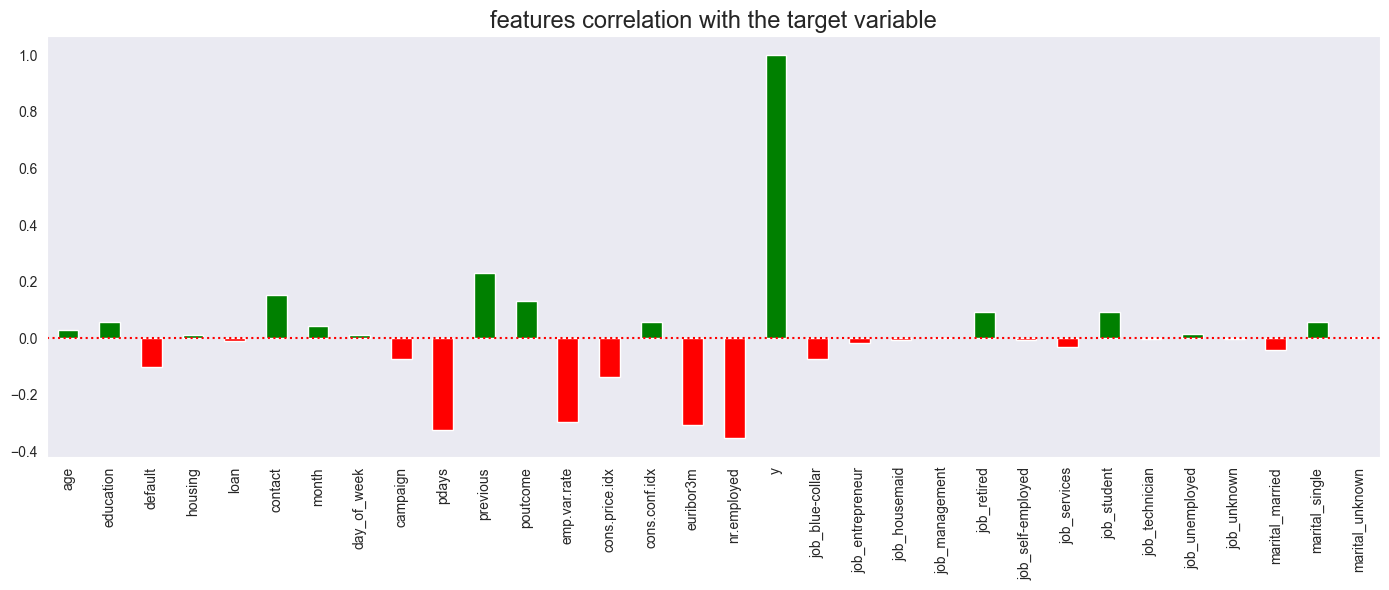

In [98]:
plt.figure(figsize=(14,6))
df.corrwith(df['y']).plot(kind='bar',color=['red' if x <=0 else 'green' for x in df.corrwith(df['y']) ])
plt.axhline(0,color='red',linestyle=':')
plt.title('features correlation with the target variable',size=17)
plt.tight_layout()

### Handling Imbalanced Data with Resampling Techniques

- **SMOTE (Synthetic Minority Over-sampling)**: Generates synthetic samples for the minority class by interpolating between existing minority instances, improving detection of class 1 (subscribed users).

- **Random Over-Sampling**: Duplicates existing minority class samples until it matches the majority class size, but may cause overfitting.

- **Models to Use**:  
  - **Random Forest Classifier**: Combines multiple trees, robust and reduces overfitting.  
  - **Balanced Random Forest**: Ensures each tree is trained on a balanced dataset.  
  - **Support Vector Classifier (SVC)**: Optimizes class separation with class weighting to better detect the minority class.


<Axes: xlabel='y', ylabel='count'>

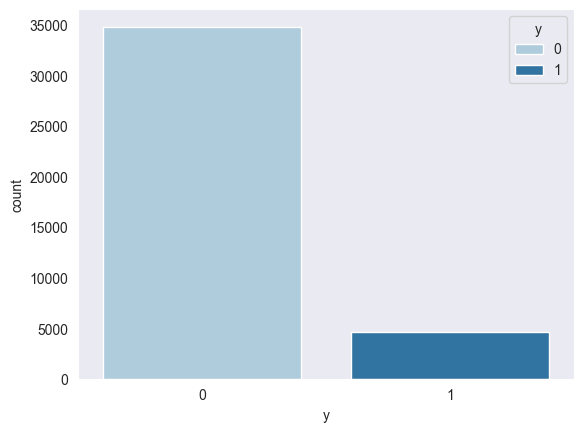

In [99]:
sns.countplot(x=df['y'],hue=df['y'],palette='Paired')

In [100]:
#spliting the data 

x,y = df.drop('y',axis=1),df['y']

#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [101]:
from pprint import  pprint as p

### **model performance before using SMOTE and Oversampling**

In [102]:
def models (model, model_name):
    mdl = model(random_state=42)
    mdl.fit(x_train,y_train)
    y_hat = mdl.predict(x_test)
    
    print(accuracy_score(y_test,y_hat))
    confusion_mat = confusion_matrix(y_test,y_hat)
    sns.heatmap(confusion_mat,fmt='d',annot=True,cmap='coolwarm')
    plt.xlabel('predicted values',size=14)
    plt.ylabel('true values',size=14)
    plt.title(f'confusion matrix of {model_name}',size=12)
    plt.show()
    print(classification_report(y_test,y_hat))
    

0.8870749450177635


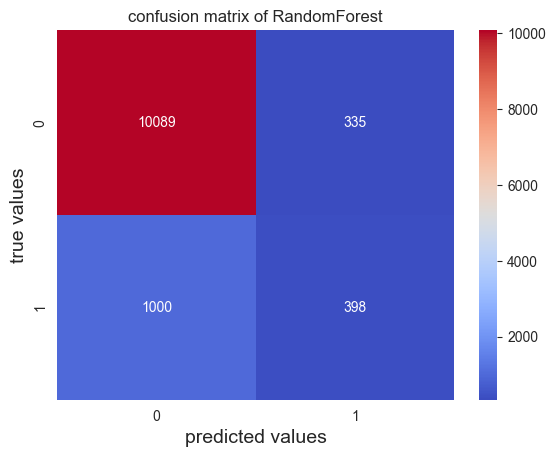

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10424
           1       0.54      0.28      0.37      1398

    accuracy                           0.89     11822
   macro avg       0.73      0.63      0.66     11822
weighted avg       0.87      0.89      0.87     11822

0.7919133818304855


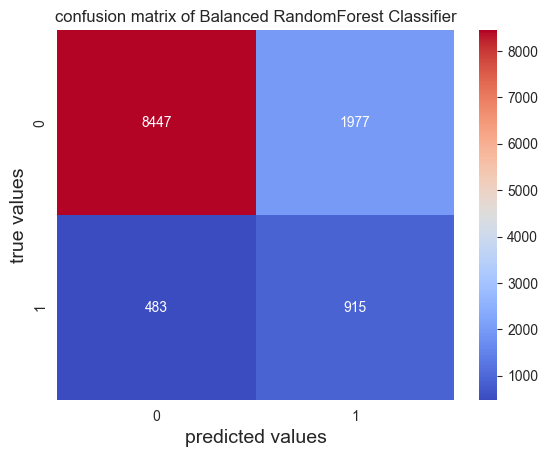

              precision    recall  f1-score   support

           0       0.95      0.81      0.87     10424
           1       0.32      0.65      0.43      1398

    accuracy                           0.79     11822
   macro avg       0.63      0.73      0.65     11822
weighted avg       0.87      0.79      0.82     11822

0.8919810522754187


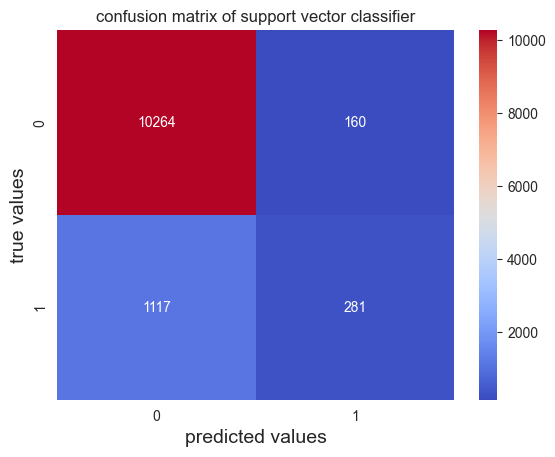

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10424
           1       0.64      0.20      0.31      1398

    accuracy                           0.89     11822
   macro avg       0.77      0.59      0.62     11822
weighted avg       0.87      0.89      0.87     11822



In [103]:
models(RandomForestClassifier,'RandomForest')
models(BalancedRandomForestClassifier,'Balanced RandomForest Classifier')
models(SVC,'support vector classifier')

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10424
           1       0.53      0.27      0.36      1398

    accuracy                           0.89     11822
   macro avg       0.72      0.62      0.65     11822
weighted avg       0.86      0.89      0.87     11822

0.8856369480629335


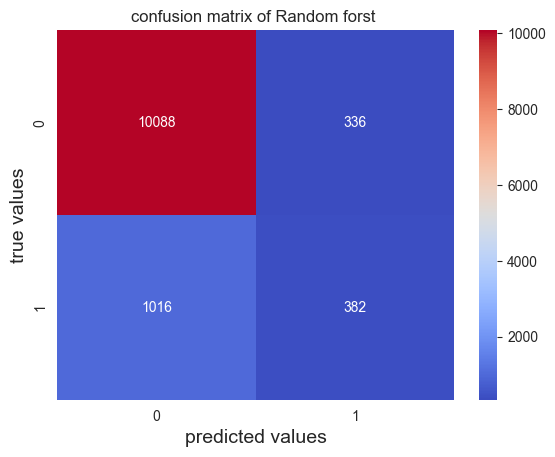

In [104]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(x_train, y_train)

# Predict and evaluate
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

confusion_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_mat,fmt='d',annot=True,cmap='coolwarm')
plt.xlabel('predicted values',size=14)
plt.ylabel('true values',size=14)
plt.title(f'confusion matrix of Random forst ',size=12)
plt.show()


#### **model performance after using the SMOTE technique**

In [105]:
from imblearn.over_sampling import  SMOTE

smote = SMOTE(random_state=42)
x_train_semp,y_train_semp = smote.fit_resample(x_train,y_train)

In [106]:
def models (model, model_name):
    mdl = model(random_state=42)
    mdl.fit(x_train_semp,y_train_semp)
    y_hat = mdl.predict(x_test)

    print(accuracy_score(y_test,y_hat))
    confusion_mat = confusion_matrix(y_test,y_hat)
    sns.heatmap(confusion_mat,fmt='d',annot=True,cmap='coolwarm')
    plt.xlabel('predicted values',size=14)
    plt.ylabel('true values',size=14)
    plt.title(f'confusion matrix of {model_name}',size=12)
    plt.show()
    print(classification_report(y_test,y_hat))

0.8654204026391473


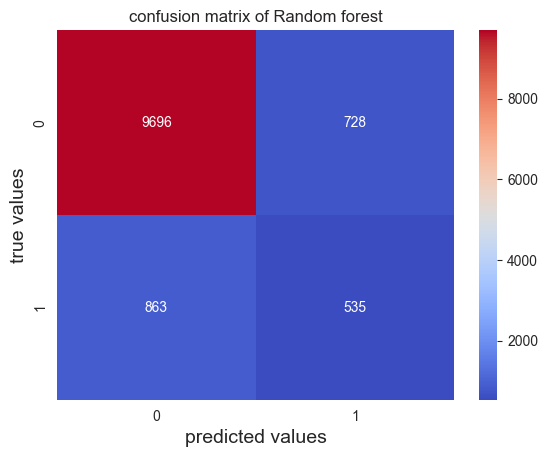

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     10424
           1       0.42      0.38      0.40      1398

    accuracy                           0.87     11822
   macro avg       0.67      0.66      0.66     11822
weighted avg       0.86      0.87      0.86     11822

0.7139231940450008


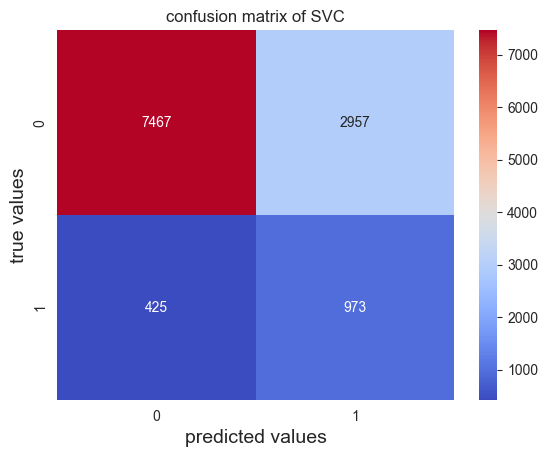

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     10424
           1       0.25      0.70      0.37      1398

    accuracy                           0.71     11822
   macro avg       0.60      0.71      0.59     11822
weighted avg       0.86      0.71      0.76     11822

0.8652512265268144


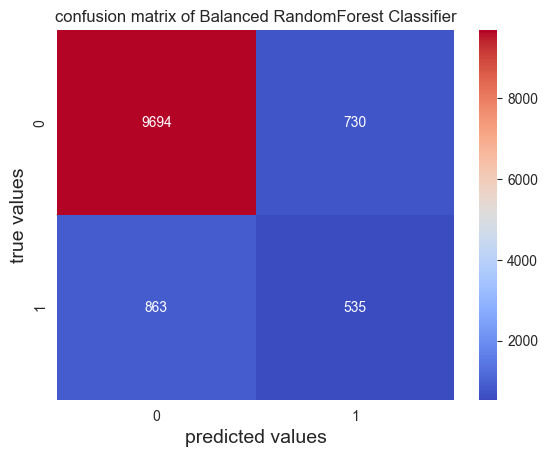

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     10424
           1       0.42      0.38      0.40      1398

    accuracy                           0.87     11822
   macro avg       0.67      0.66      0.66     11822
weighted avg       0.86      0.87      0.86     11822



In [107]:
models(RandomForestClassifier,'Random forest')
models(SVC,'SVC')
models(BalancedRandomForestClassifier,'Balanced RandomForest Classifier')

#### **model performance after using the underSampling method technique**

In [108]:
from joblib import dump, load

In [109]:
from imblearn.over_sampling import RandomOverSampler

Oversampler = RandomOverSampler(random_state=42)
x_res, y_res = Oversampler.fit_resample(x, y)

x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.3,random_state=42)



In [110]:
def models (model, model_name):
    mdl = model(random_state=42)
    mdl.fit(x_train,y_train)
    y_hat = mdl.predict(x_test)

    print(accuracy_score(y_test,y_hat))
    confusion_mat = confusion_matrix(y_test,y_hat)
    sns.heatmap(confusion_mat,fmt='d',annot=True,cmap='coolwarm')
    plt.xlabel('predicted values',size=14)
    plt.ylabel('true values',size=14)
    plt.title(f'confusion matrix of {model_name}',size=12)
    plt.show()
    print(classification_report(y_test,y_hat))

0.9591074506799464


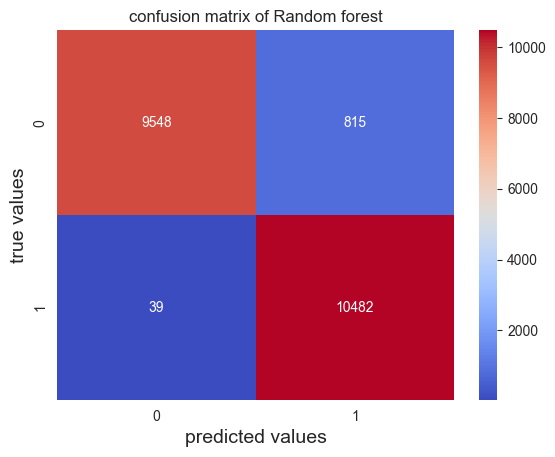

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10363
           1       0.93      1.00      0.96     10521

    accuracy                           0.96     20884
   macro avg       0.96      0.96      0.96     20884
weighted avg       0.96      0.96      0.96     20884

0.7132254357402796


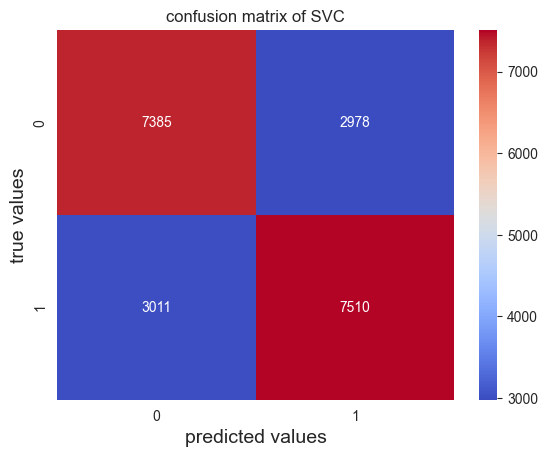

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     10363
           1       0.72      0.71      0.71     10521

    accuracy                           0.71     20884
   macro avg       0.71      0.71      0.71     20884
weighted avg       0.71      0.71      0.71     20884

0.9588201493966673


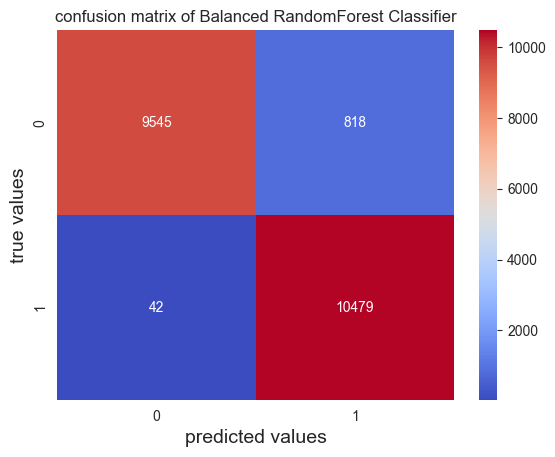

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10363
           1       0.93      1.00      0.96     10521

    accuracy                           0.96     20884
   macro avg       0.96      0.96      0.96     20884
weighted avg       0.96      0.96      0.96     20884



In [111]:
models(RandomForestClassifier,'Random forest')
models(SVC,'SVC')
models(BalancedRandomForestClassifier,'Balanced RandomForest Classifier')

### **model testing**

0.9591074506799464


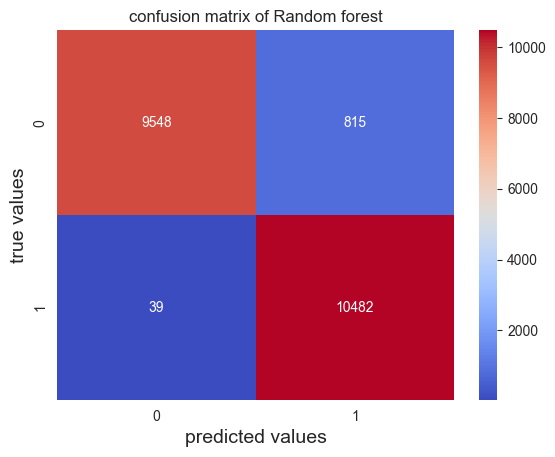

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10363
           1       0.93      1.00      0.96     10521

    accuracy                           0.96     20884
   macro avg       0.96      0.96      0.96     20884
weighted avg       0.96      0.96      0.96     20884



['ranf.joblib']

In [112]:
from imblearn.over_sampling import RandomOverSampler

Oversampler = RandomOverSampler(random_state=42)
x_res, y_res = Oversampler.fit_resample(x, y)

x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.3,random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
y_hat = model.predict(x_test)
print(accuracy_score(y_test,y_hat))
confusion_mat = confusion_matrix(y_test,y_hat)
sns.heatmap(confusion_mat,fmt='d',annot=True,cmap='coolwarm')
plt.xlabel('predicted values',size=14)
plt.ylabel('true values',size=14)
plt.title('confusion matrix of Random forest',size=12)
plt.show()
print(classification_report(y_test,y_hat))
dump(model,'ranf.joblib')


In [113]:
y_hat2  = model.predict(x[:1000])

0.999


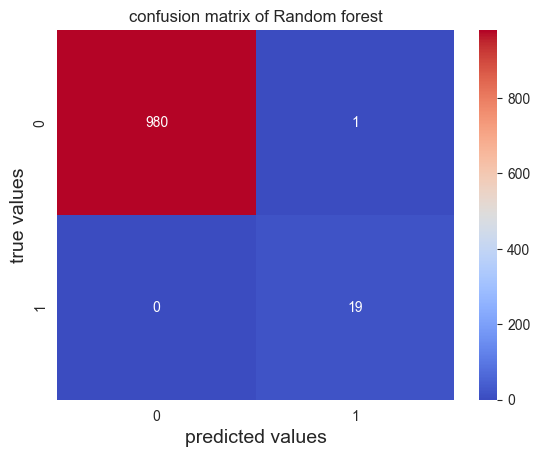

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       981
           1       0.95      1.00      0.97        19

    accuracy                           1.00      1000
   macro avg       0.97      1.00      0.99      1000
weighted avg       1.00      1.00      1.00      1000



['ranf.joblib']

In [114]:
print(accuracy_score(y[:1000],y_hat2))
confusion_mat = confusion_matrix(y[:1000],y_hat2)
sns.heatmap(confusion_mat,fmt='d',annot=True,cmap='coolwarm')
plt.xlabel('predicted values',size=14)
plt.ylabel('true values',size=14)
plt.title('confusion matrix of Random forest',size=12)
plt.show()
print(classification_report(y[:1000],y_hat2))
dump(model,'ranf.joblib')